In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Set plotting format
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

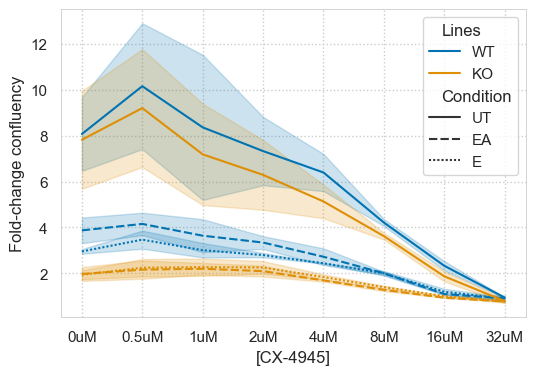

In [3]:
from msresist.figures.figure3 import plot_InhDR_timepoint

_, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_InhDR_timepoint(ax, "CX-4945")
plt.savefig("cx.png", dpi=300)

In [4]:
conf_raw = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/DTPs/3days_confluence.csv").set_index("Elapsed")
conf_raw.columns = [c.split(".")[0] for c in conf_raw.columns]
conf = pd.melt(conf_raw.reset_index(), id_vars="Elapsed", value_vars=list(conf_raw.columns[1:]), var_name="Condition", value_name="Norm Cell Growth")
conf.insert(1, "Cell Line", [c.split("_")[0] for c in list(conf["Condition"])])
conf.insert(2, "Treatment", [c.split("_")[1] for c in list(conf["Condition"])])
conf = conf.drop("Condition", axis=1)

red_raw = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/DTPs/3days_red_integrated.csv").set_index("Elapsed")
red_raw.columns = [c.split(".")[0] for c in red_raw.columns]
red = pd.melt(red_raw.reset_index(), id_vars="Elapsed", value_vars=list(red_raw.columns[1:]), var_name="Condition", value_name="Norm YAP activity")
red.insert(1, "Cell Line", [c.split("_")[0] for c in list(red["Condition"])])
red.insert(2, "Treatment", [c.split("_")[1] for c in list(red["Condition"])])
red = red.drop("Condition", axis=1)

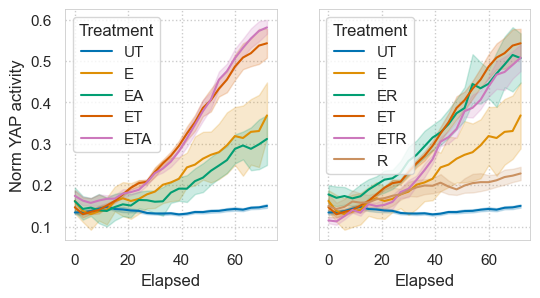

In [7]:
t1 = ["UT", "E", "EA", "ET", "ETA"]
t2 = ["UT", "E", "ER", "ET", "ETR", "R"]

_, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
d = red.set_index("Treatment").loc[t1].reset_index()
sns.lineplot(data=d, x="Elapsed", y="Norm YAP activity", ci=63, hue="Treatment", ax=ax[0])
d = red.set_index("Treatment").loc[t2].reset_index()
sns.lineplot(data=d, x="Elapsed", y="Norm YAP activity", ci=63, hue="Treatment", ax=ax[1])
plt.savefig("YAP_EAR.png", dpi=300)

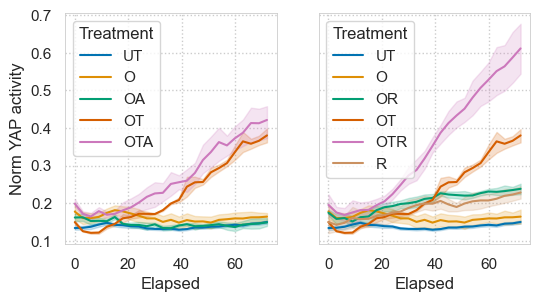

In [8]:
t1 = ["UT", "O", "OA", "OT", "OTA"]
t2 = ["UT", "O", "OR", "OT", "OTR", "R"]

_, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
d = red.set_index("Treatment").loc[t1].reset_index()
sns.lineplot(data=d, x="Elapsed", y="Norm YAP activity", ci=63, hue="Treatment", ax=ax[0])
d = red.set_index("Treatment").loc[t2].reset_index()
sns.lineplot(data=d, x="Elapsed", y="Norm YAP activity", ci=63, hue="Treatment", ax=ax[1])
plt.savefig("YAP_OAR.png", dpi=300)

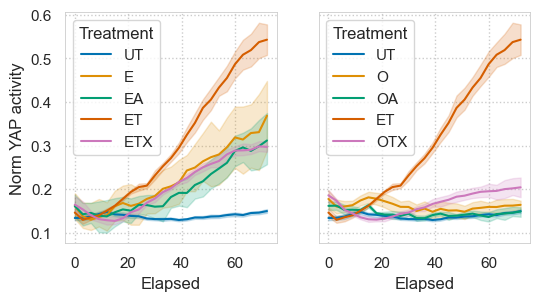

In [10]:
t1 = ["UT", "E", "EA", "ET", "ETX"]
t2 = ["UT", "O", "OA", "ET", "OTX"]

_, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
d = red.set_index("Treatment").loc[t1].reset_index()
sns.lineplot(data=d, x="Elapsed", y="Norm YAP activity", ci=63, hue="Treatment", ax=ax[0])
d = red.set_index("Treatment").loc[t2].reset_index()
sns.lineplot(data=d, x="Elapsed", y="Norm YAP activity", ci=63, hue="Treatment", ax=ax[1])
plt.savefig("YAP_TX.png", dpi=300)

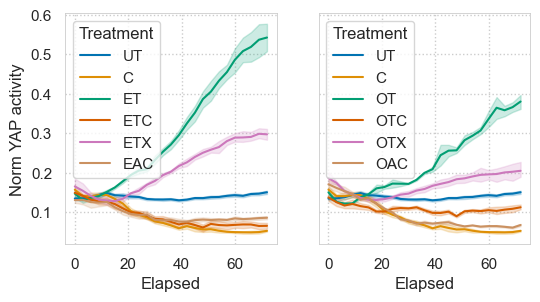

In [11]:
t1 = ["UT", "C", "ET", "ETC", "ETX", "EAC"]
t2 = ["UT", "C", "OT", "OTC", "OTX", "OAC"]

_, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
d = red.set_index("Treatment").loc[t1].reset_index()
sns.lineplot(data=d, x="Elapsed", y="Norm YAP activity", ci=63, hue="Treatment", ax=ax[0])
d = red.set_index("Treatment").loc[t2].reset_index()
sns.lineplot(data=d, x="Elapsed", y="Norm YAP activity", ci=63, hue="Treatment", ax=ax[1])
plt.savefig("cx.png", dpi=300)

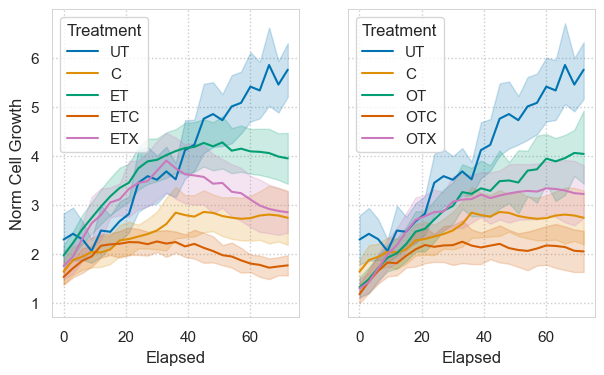

In [14]:
t1 = ["UT", "C", "ET", "ETC", "ETX"]
t2 = ["UT", "C", "OT", "OTC", "OTX"]

_, ax = plt.subplots(1, 2, figsize=(7, 4), sharey=True)
d = conf.set_index("Treatment").loc[t1].reset_index()
d = d[d["Cell Line"] == "WT"]
sns.lineplot(data=d, x="Elapsed", y="Norm Cell Growth", ci=63, hue="Treatment", ax=ax[0])
d = conf.set_index("Treatment").loc[t2].reset_index()
d = d[d["Cell Line"] == "WT"]
sns.lineplot(data=d, x="Elapsed", y="Norm Cell Growth", ci=63, hue="Treatment", ax=ax[1])
plt.savefig("cv.png", dpi=300)

In [ ]:
t1 = ["UT", "C", "ET", "ETC", "ETX", "EAC"]
t2 = ["UT", "C", "OT", "OTC", "OTX", "OAC"]

_, ax = plt.subplots(1, 2, figsize=(8, 4))
d = conf.set_index("Treatment").loc[t1].reset_index()
d = d[d["Cell Line"] == "AXLKO"]
sns.lineplot(data=d, x="Elapsed", y="Norm Cell Growth", ci=63, hue="Treatment", ax=ax[0])
d = conf.set_index("Treatment").loc[t2].reset_index()
d = d[d["Cell Line"] == "AXLKO"]
sns.lineplot(data=d, x="Elapsed", y="Norm Cell Growth", ci=63, hue="Treatment", ax=ax[1])